In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#load dataset
df = pd.read_csv("dataset1.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (7043, 21)

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contrac

In [ ]:
#handle missing values totalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-5-1456814750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
#tenur group

def tenure_group(tenure):
    if tenure <= 12:
        return 'Low'
    elif tenure <= 48:
        return 'Medium'
    else:
        return 'High'

df['TenureGroup'] = df['tenure'].apply(tenure_group)


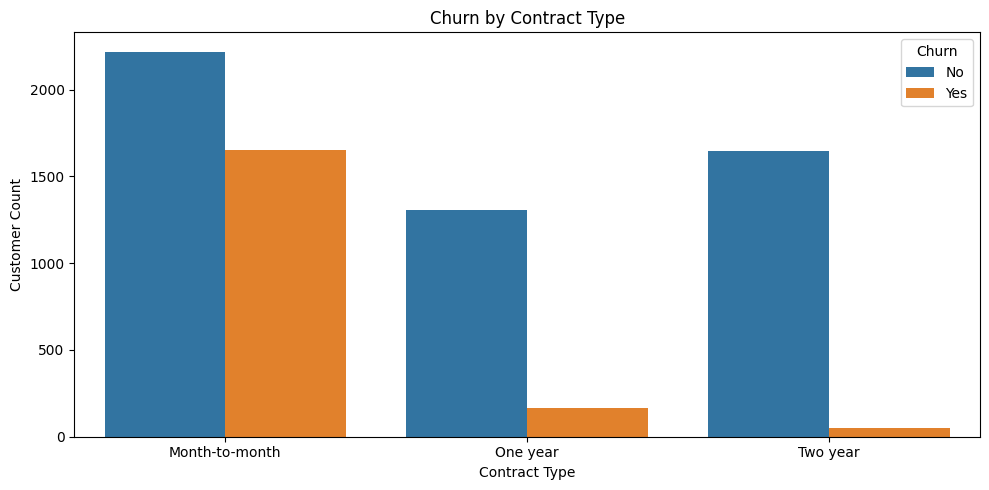

In [ ]:
#churnch by types
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.ylabel('Customer Count')
plt.xlabel('Contract Type')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

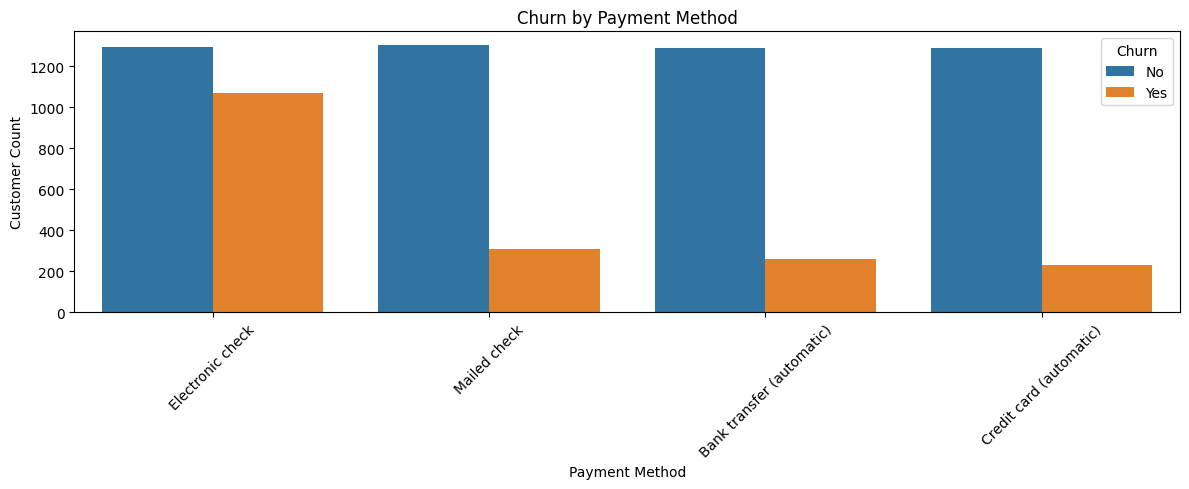

In [ ]:
#Churn by payment method

plt.figure(figsize=(12, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Customer Count')
plt.xlabel('Payment Method')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [ ]:
#Normalize monthlyCharges and totalCharges.
scaler = MinMaxScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

In [ ]:
# display final few rows
print("\nFinal dataset preview:")
print(df.head())


Final dataset preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df_model = df.copy()

In [13]:
# Apply LabelEncoder to all object columns
le = LabelEncoder()
for column in df_model.select_dtypes(include='object').columns:
    df_model[column] = le.fit_transform(df_model[column])

In [14]:
# Check encoded data
df_model.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,0.115423,0.001275,0,1
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,0.385075,0.215867,0,2
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,0.354229,0.010310,1,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,0.239303,0.210241,0,2
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,0.521891,0.015330,1,1


In [15]:
from sklearn.model_selection import train_test_split

# Drop customerID as it's not useful for prediction
X = df_model.drop(columns=["Churn", "customerID"])
y = df_model["Churn"]

In [16]:
#split for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model train
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

In [21]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))


📊 Logistic Regression Evaluation:
Accuracy : 0.7984386089425124
Precision: 0.6490066225165563
Recall   : 0.5240641711229946
F1 Score : 0.5798816568047337

📊 Decision Tree Evaluation:
Accuracy : 0.7253371185237757
Precision: 0.4830287206266319
Recall   : 0.4946524064171123
F1 Score : 0.48877146631439894

📊 Random Forest Evaluation:
Accuracy : 0.7885024840312278
Precision: 0.6301369863013698
Recall   : 0.4919786096256685
F1 Score : 0.5525525525525525


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize grid search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Best model
best_logreg = grid.best_estimator_

# Print best params
print("✅ Best Hyperparameters for Logistic Regression:")
print(grid.best_params_)

✅ Best Hyperparameters for Logistic Regression:
{'C': 1, 'solver': 'lbfgs'}


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred_best = best_logreg.predict(X_test)

# Evaluate
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))

Accuracy : 0.7984386089425124
Precision: 0.6490066225165563
Recall   : 0.5240641711229946
F1 Score : 0.5798816568047337


In [25]:
import pandas as pd
import numpy as np

# Get feature names and their coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
})

# Sort by absolute value to see most impactful features
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Show top 10
print(" Top 10 Important Features:")
print(importance_df[['Feature', 'Coefficient']].head(10))

 Top 10 Important Features:
             Feature  Coefficient
17    MonthlyCharges     2.603961
5       PhoneService    -0.902406
14          Contract    -0.781845
18      TotalCharges     0.661508
15  PaperlessBilling     0.406995
19       TenureGroup    -0.294675
8     OnlineSecurity    -0.282412
11       TechSupport    -0.252992
7    InternetService     0.230070
3         Dependents    -0.223696


/tmp/ipython-input-27-2929584469.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
/tmp/ipython-input-27-2929584469.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


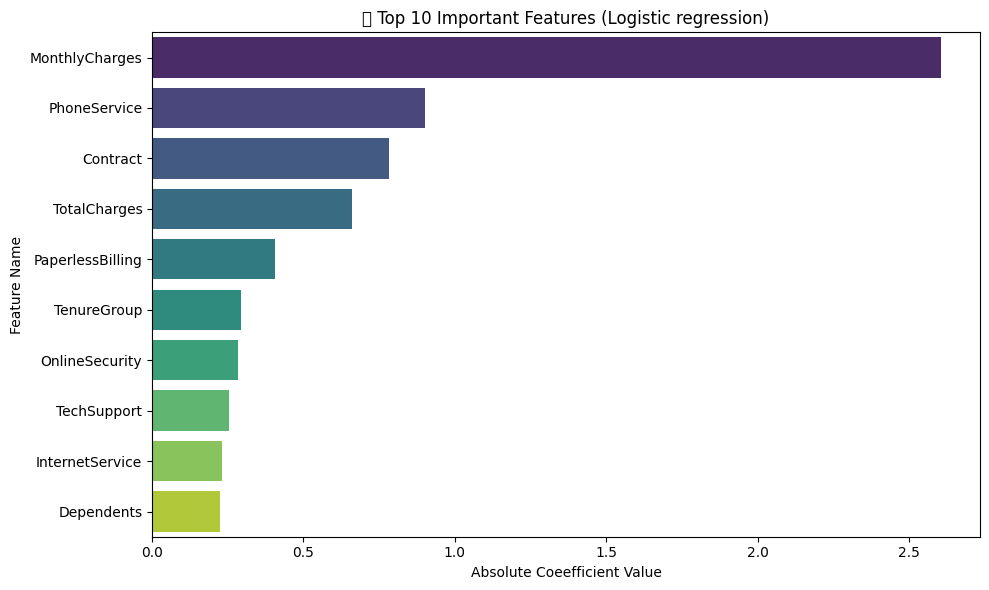

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
})

# Sort by absolute value
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 features
top_features = importance_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('🔍 Top 10 Important Features (Logistic regression)')
plt.xlabel('Absolute Coeefficient Value')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import re, string
from sklearn.model_selection import train_test_split
from datasets import Dataset

df = pd.read_csv("dataset2.csv")
df['created_at'] = pd.to_datetime(df['created_at'])
inbound_df = df[df['inbound'] == True].copy()
outbound_df = df[df['inbound'] == False].copy()
merged_df = inbound_df.merge(
    outbound_df[['in_response_to_tweet_id', 'created_at']],
    left_on='tweet_id',
    right_on='in_response_to_tweet_id',
    suffixes=('_customer', '_support')
)
merged_df['response_time'] = (merged_df['created_at_support'] - merged_df['created_at_customer']).dt.total_seconds()
merged_df['urgency'] = merged_df['response_time'].apply(lambda x: 1 if x < 3600 else 0)
print(merged_df[['text', 'response_time', 'urgency']].head())


                                                text  response_time  urgency
0  @76328 I really hope you all change but I'm su...         1540.0        1
1  @VirginTrains see attached error message. I've...          473.0        1
2  @VirginTrains yep, I've tried laptop too sever...          398.0        1
3  @VirginTrains I still haven't heard &amp; the ...          428.0        1
4  @105838 @AppleSupport Me too am suffering , ho...        21662.0        0


/tmp/ipython-input-34-3653464941.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [36]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)   # remove URLs
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

merged_df['clean_tweet'] = merged_df['text'].astype(str).apply(clean_text)
print(merged_df[['text', 'clean_tweet']].head())

                                                text  \
0  @76328 I really hope you all change but I'm su...   
1  @VirginTrains see attached error message. I've...   
2  @VirginTrains yep, I've tried laptop too sever...   
3  @VirginTrains I still haven't heard &amp; the ...   
4  @105838 @AppleSupport Me too am suffering , ho...   

                                         clean_tweet  
0  i really hope you all change but im sure you w...  
1  see attached error message ive tried leaving a...  
2  yep ive tried laptop too several times over th...  
3  i still havent heard amp the number im directe...  
4  me too am suffering  hope the can find a solution  


In [38]:
from datasets import Dataset

# Prepare data for Hugging Face
train_df = merged_df[['clean_tweet', 'urgency']].dropna().copy()

# Rename columns for compatibility
train_df.rename(columns={'clean_tweet': 'text', 'urgency': 'label'}, inplace=True)

# Convert to Hugging Face dataset
dataset = Dataset.from_pandas(train_df)

# Train-test split (80-20)
dataset = dataset.train_test_split(test_size=0.2)

In [39]:
from transformers import DistilBertTokenizerFast

# Load the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/33 [00:00<?, ? examples/s]

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

In [40]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT for binary classification (urgent vs non-urgent)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
from transformers import TrainingArguments, Trainer

# Set training configuration
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no"
)

# Set up Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"]
)
trainer.train()

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'